# Aufgabe 2: " Convolutional Neural Network (CNN)" für Bilddaten

### CNN Seminar des Biomedical Data Science Curriculums

<span style="color:red">**Anmerkung:** Version mit Lösung für die Lehrprobe, Universitätsmedizin Göttingen,
Freitag, 25. September 2020 </span>


**Ziel:** Training eines " Convolutional Neural Network (CNN)" für die Klassifikation der MNIST Zahlen

**ToDo:**
- Vervollständigen Sie die Lücken im Code (mit #ToDo und Kommentar versehenen)
- Führen Sie am Ende die Selbstkontrolle aus, um die Funktionalität sicherzustellen
- Reichen Sie den finalen Code per Email als *.html Export ein

**Lernziele:**
- Definition eines mehrschichtigen CNN in PyTorch (Convolution und Pooling Layers)

**Vorgeschlagene Architektur des CNN**

<img src="figures/CNN.png" width=800px>

<img src="figures/example_2.png" width=300px>

In [1]:
# Vorbereitung - keine Änderungen in diesem Block notwendig

# Import der Bibliotheken
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Definition von "transform" um die Daten zu normalisieren
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)), ])

# Download der MNIST Daten
data_set = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# Daten Aufteilung und Definition des "trainloader"
train_set, val_set = torch.utils.data.random_split(data_set, [50000, 10000])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=True)

In [ ]:
# Teilaufgabe 1: Definiere ein einfaches NN mit 768 input features und 10 output features (für die Ziffern 0 - 9)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # Definiere erste 2D convolution mit 1 input channel, 16 output channels, und kernel size 3,
        # stride von 1 und padding von 1
        self.conv1 = # ToDo
        
        # Definiere  pooling Schicht (max pooling mit kernel size 2 und stride 2)
        self.pool = # ToDo
        
        # Definiere zweite 2D convolution mit 1 input channel, 16 output channels, und kernel size 3
        # stride von 1 und padding von 1
        self.conv2 = # ToDo

        # Definiere "fully connected Schichten" von 1568 Neuronen zu 124 Neuronen, zu 64 Neuronen,
        # zu 10 Neuronen für die Ziffern 0 bis 9 
        self.fc1 = # ToDo
        self.fc2 = # ToDo
        self.fc3 = # ToDo

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

model = CNN()


loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Äußerer Loop für die Epochen
epochs = 10
for e in range(epochs):
    
    # Loop für Training
    running_train_loss = 0
    for images, labels in train_loader:
        
    
        optimizer.zero_grad()
        
        output = model(images)
        train_loss = loss_function(output, labels)
        
        train_loss.backward()
        optimizer.step()
        
        running_train_loss += train_loss.item()
        
    print(f"Training loss: {running_train_loss/len(train_loader)}")
    
    # Loop für Validation
    running_val_loss = 0
    for images, labels in val_loader:
        
        output = model(images)
        val_loss = loss_function(output, labels)
        
        running_val_loss += val_loss.item()
        
    print(f"Validation loss: {running_val_loss/len(val_loader)}")
    
    

## Lösung

<span style="color:red">**Anmerkung:** Version mit Lösung für die Lehrprobe, Universitätsmedizin Göttingen,
Freitag, 25. September 2020 </span>

In [2]:
# Teilaufgabe 1: Definiere ein einfaches NN mit 768 input features und 10 output features (für die Ziffern 0 - 9)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # Definiere erste 2D convolution mit 1 input channel, 16 output channels, und kernel size 3
        # stride von 1 und padding von 1
        self.conv1 = nn.Conv2d(1, 16, 3, stride=1, padding=1)
        
        # Definiere  pooling Schicht (max pooling mit kernel size 2 und stride 2)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Definiere zweite 2D convolution mit 1 input channel, 16 output channels, und kernel size 3
        # stride von 1 und padding von 1
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)

        # Definiere "fully connected Schichten" von 1568 Neuronen zu 124 Neuronen, zu 64 Neuronen,
        # zu 10 Neuronen für die Ziffern 0 bis 9 
        self.fc1 = nn.Linear(32 * 7 * 7, 124)
        self.fc2 = nn.Linear(124, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

model = CNN()


loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Äußerer Loop für die Epochen
epochs = 10
for e in range(epochs):
    
    # Loop für Training
    running_train_loss = 0
    for images, labels in train_loader:
        
    
        optimizer.zero_grad()
        
        output = model(images)
        train_loss = loss_function(output, labels)
        
        train_loss.backward()
        optimizer.step()
        
        running_train_loss += train_loss.item()
        
    print(f"Training loss: {running_train_loss/len(train_loader)}")
    
    # Loop für Validation
    running_val_loss = 0
    for images, labels in val_loader:
        
        output = model(images)
        val_loss = loss_function(output, labels)
        
        running_val_loss += val_loss.item()
        
    print(f"Validation loss: {running_val_loss/len(val_loader)}")
    
    

Training loss: 2.2854592351962233
Validation loss: 2.2604619484798163
Training loss: 2.1730120168317613
Validation loss: 1.9636325805809847
Training loss: 1.1944753219709372
Validation loss: 0.6127555100781144
Training loss: 0.4769523940656496
Validation loss: 0.3773890704296197
Training loss: 0.3365080114882773
Validation loss: 0.2917437777397739
Training loss: 0.2752404385020056
Validation loss: 0.2479610234309154
Training loss: 0.23515558212309542
Validation loss: 0.24030090166125329
Training loss: 0.2053331477982004
Validation loss: 0.1903545334460629
Training loss: 0.1816177097723231
Validation loss: 0.17019122763044514
Training loss: 0.16369161217013742
Validation loss: 0.15184136268914125


### Selbstkontrolle
Führen Sie den folgenden Code aus, um die Funktion Ihres NN zu überprüfen.

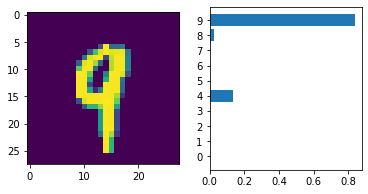

In [3]:
# Extraktion eines Beispielbilds
images, labels = next(iter(val_loader))

# NN ausführen
pred_logprobs = model(images)

# Log-Wahrscheinlichkeit zu Standardeinheitsintervall
pred_probs = torch.exp(pred_logprobs)

# Plotten des Ergebnisses
fig, (ax1, ax2) = plt.subplots(figsize=(6,3), ncols=2)

ax1.imshow(images[0][0])
ax2.barh(np.arange(10), pred_probs[0].data.numpy().squeeze())
ax2.set_yticks(np.arange(10))